# Análisis de las variables Horas Estudiadas y Horas de Sueño

## Objetivo
Determinar cómo influyen las **Horas de Estudio** y las **Horas de Sueño** en el rendimiento académico mediante un análisis exploratorio y la aplicación de un modelo de regresión múltiple que permita interpretar sus coeficientes.

### Tareas
1. Análisis descriptivo de Horas Estudiadas
2. Análisis descriptivo de Horas de Sueño
3. Visualización mediante gráficos de dispersión
4. Cálculo de correlaciones
5. Ajuste de modelo de regresión múltiple
6. Interpretación de coeficientes y análisis comparativo

## 1. Importación de librerías y carga de datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [2]:
df = pd.read_csv("../data/Student_Performance.csv")
print(f"Dimensiones del dataset: {df.shape}")
df.head()

Dimensiones del dataset: (10000, 6)


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [3]:
# Eliminar duplicados
duplicados = df.duplicated().sum()
print(f"Filas duplicadas encontradas: {duplicados}")
df = df.drop_duplicates().reset_index(drop=True)
print(f"Dimensiones tras eliminar duplicados: {df.shape}")

Filas duplicadas encontradas: 127
Dimensiones tras eliminar duplicados: (9873, 6)


In [4]:
# Verificar valores nulos
print("Valores nulos por columna:")
print(df.isnull().sum())

Valores nulos por columna:
Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64


## 2. Análisis descriptivo de Horas Estudiadas

In [5]:
print("=" * 50)
print("ESTADÍSTICAS DESCRIPTIVAS: Hours Studied")
print("=" * 50)
print(df["Hours Studied"].describe())
print(f"\nModa: {df['Hours Studied'].mode().values[0]}")
print(f"Rango: {df['Hours Studied'].max() - df['Hours Studied'].min()}")
print(f"Varianza: {df['Hours Studied'].var():.4f}")
print(f"Asimetría (skewness): {df['Hours Studied'].skew():.4f}")
print(f"Curtosis: {df['Hours Studied'].kurtosis():.4f}")

ESTADÍSTICAS DESCRIPTIVAS: Hours Studied
count    9873.000000
mean        4.992100
std         2.589081
min         1.000000
25%         3.000000
50%         5.000000
75%         7.000000
max         9.000000
Name: Hours Studied, dtype: float64

Moda: 1
Rango: 8
Varianza: 6.7033
Asimetría (skewness): -0.0033
Curtosis: -1.2338


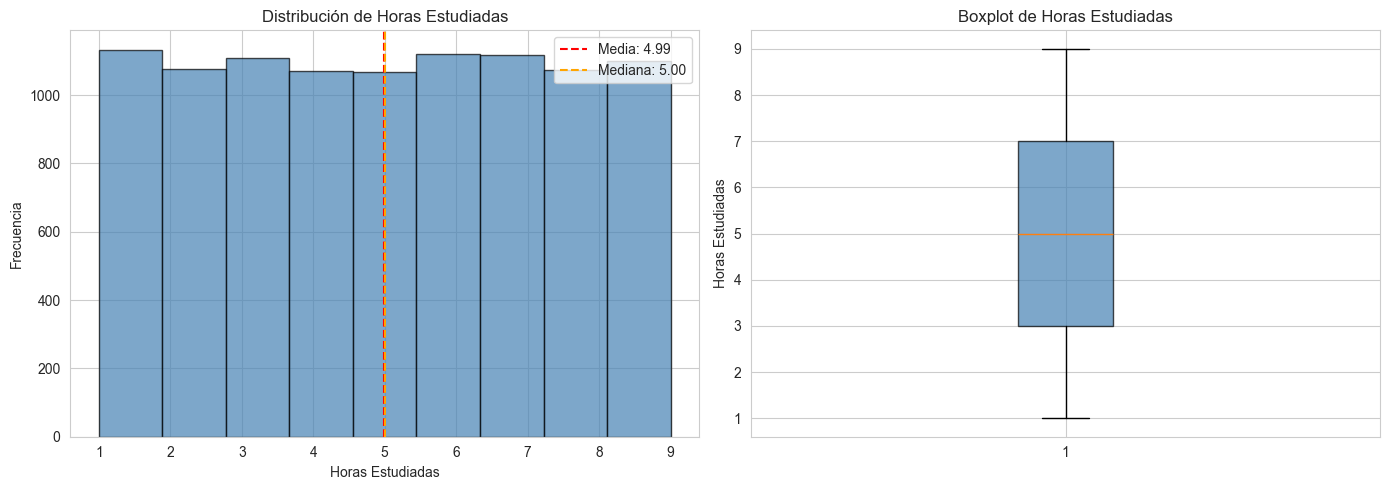

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histograma
axes[0].hist(df["Hours Studied"], bins=9, edgecolor="black", color="steelblue", alpha=0.7)
axes[0].axvline(df["Hours Studied"].mean(), color="red", linestyle="--", label=f"Media: {df['Hours Studied'].mean():.2f}")
axes[0].axvline(df["Hours Studied"].median(), color="orange", linestyle="--", label=f"Mediana: {df['Hours Studied'].median():.2f}")
axes[0].set_title("Distribución de Horas Estudiadas")
axes[0].set_xlabel("Horas Estudiadas")
axes[0].set_ylabel("Frecuencia")
axes[0].legend()

# Boxplot
axes[1].boxplot(df["Hours Studied"], vert=True, patch_artist=True,
                boxprops=dict(facecolor="steelblue", alpha=0.7))
axes[1].set_title("Boxplot de Horas Estudiadas")
axes[1].set_ylabel("Horas Estudiadas")

plt.tight_layout()
plt.show()

## 3. Análisis descriptivo de Horas de Sueño

In [7]:
print("=" * 50)
print("ESTADÍSTICAS DESCRIPTIVAS: Sleep Hours")
print("=" * 50)
print(df["Sleep Hours"].describe())
print(f"\nModa: {df['Sleep Hours'].mode().values[0]}")
print(f"Rango: {df['Sleep Hours'].max() - df['Sleep Hours'].min()}")
print(f"Varianza: {df['Sleep Hours'].var():.4f}")
print(f"Asimetría (skewness): {df['Sleep Hours'].skew():.4f}")
print(f"Curtosis: {df['Sleep Hours'].kurtosis():.4f}")

ESTADÍSTICAS DESCRIPTIVAS: Sleep Hours
count    9873.000000
mean        6.531652
std         1.697683
min         4.000000
25%         5.000000
50%         7.000000
75%         8.000000
max         9.000000
Name: Sleep Hours, dtype: float64

Moda: 8
Rango: 5
Varianza: 2.8821
Asimetría (skewness): -0.0413
Curtosis: -1.2591


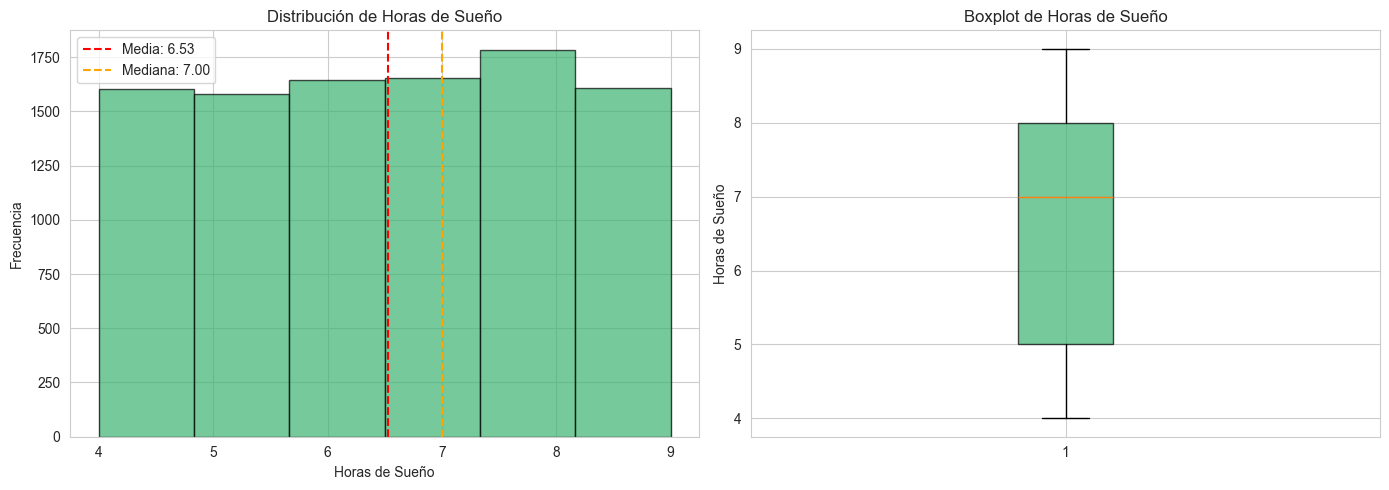

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histograma
axes[0].hist(df["Sleep Hours"], bins=6, edgecolor="black", color="mediumseagreen", alpha=0.7)
axes[0].axvline(df["Sleep Hours"].mean(), color="red", linestyle="--", label=f"Media: {df['Sleep Hours'].mean():.2f}")
axes[0].axvline(df["Sleep Hours"].median(), color="orange", linestyle="--", label=f"Mediana: {df['Sleep Hours'].median():.2f}")
axes[0].set_title("Distribución de Horas de Sueño")
axes[0].set_xlabel("Horas de Sueño")
axes[0].set_ylabel("Frecuencia")
axes[0].legend()

# Boxplot
axes[1].boxplot(df["Sleep Hours"], vert=True, patch_artist=True,
                boxprops=dict(facecolor="mediumseagreen", alpha=0.7))
axes[1].set_title("Boxplot de Horas de Sueño")
axes[1].set_ylabel("Horas de Sueño")

plt.tight_layout()
plt.show()

## 4. Visualización mediante gráficos de dispersión

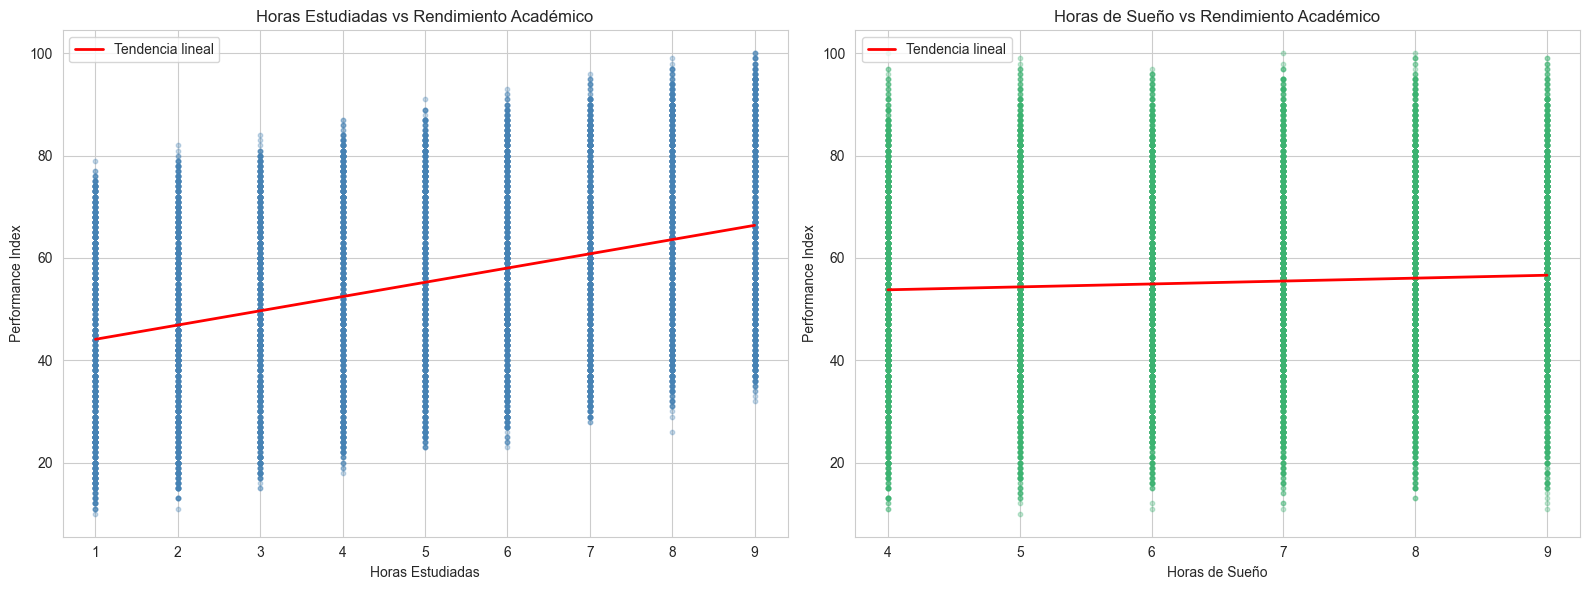

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Horas Estudiadas vs Performance Index
axes[0].scatter(df["Hours Studied"], df["Performance Index"], alpha=0.3, color="steelblue", s=10)
z1 = np.polyfit(df["Hours Studied"], df["Performance Index"], 1)
p1 = np.poly1d(z1)
x_range1 = np.linspace(df["Hours Studied"].min(), df["Hours Studied"].max(), 100)
axes[0].plot(x_range1, p1(x_range1), color="red", linewidth=2, label=f"Tendencia lineal")
axes[0].set_title("Horas Estudiadas vs Rendimiento Académico")
axes[0].set_xlabel("Horas Estudiadas")
axes[0].set_ylabel("Performance Index")
axes[0].legend()

# Horas de Sueño vs Performance Index
axes[1].scatter(df["Sleep Hours"], df["Performance Index"], alpha=0.3, color="mediumseagreen", s=10)
z2 = np.polyfit(df["Sleep Hours"], df["Performance Index"], 1)
p2 = np.poly1d(z2)
x_range2 = np.linspace(df["Sleep Hours"].min(), df["Sleep Hours"].max(), 100)
axes[1].plot(x_range2, p2(x_range2), color="red", linewidth=2, label=f"Tendencia lineal")
axes[1].set_title("Horas de Sueño vs Rendimiento Académico")
axes[1].set_xlabel("Horas de Sueño")
axes[1].set_ylabel("Performance Index")
axes[1].legend()

plt.tight_layout()
plt.show()

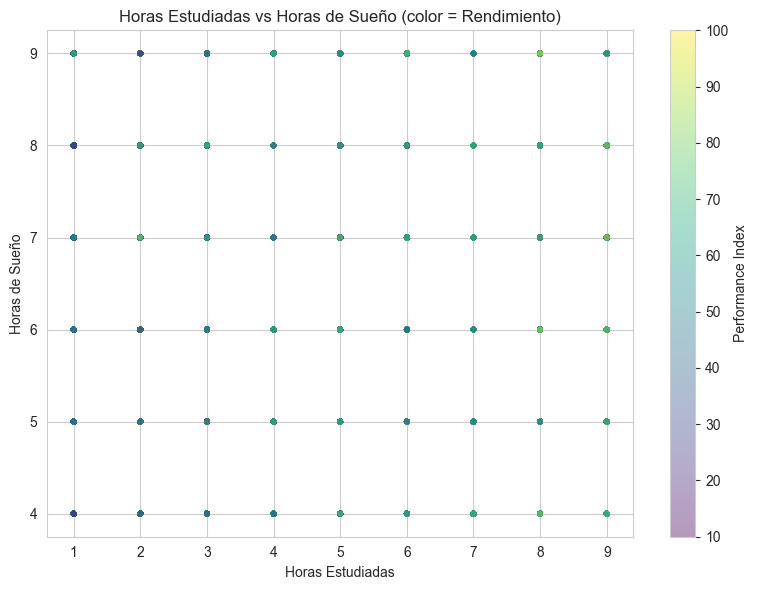

In [10]:
# Gráfico de dispersión entre ambas variables independientes
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df["Hours Studied"], df["Sleep Hours"],
                      c=df["Performance Index"], cmap="viridis", alpha=0.4, s=10)
plt.colorbar(scatter, label="Performance Index")
plt.title("Horas Estudiadas vs Horas de Sueño (color = Rendimiento)")
plt.xlabel("Horas Estudiadas")
plt.ylabel("Horas de Sueño")
plt.tight_layout()
plt.show()

## 5. Cálculo de correlaciones

In [11]:
variables = ["Hours Studied", "Sleep Hours", "Performance Index"]
correlaciones = df[variables].corr()
print("Matriz de correlación (Pearson):")
print(correlaciones.round(4))

Matriz de correlación (Pearson):
                   Hours Studied  Sleep Hours  Performance Index
Hours Studied             1.0000       0.0021             0.3753
Sleep Hours               0.0021       1.0000             0.0504
Performance Index         0.3753       0.0504             1.0000


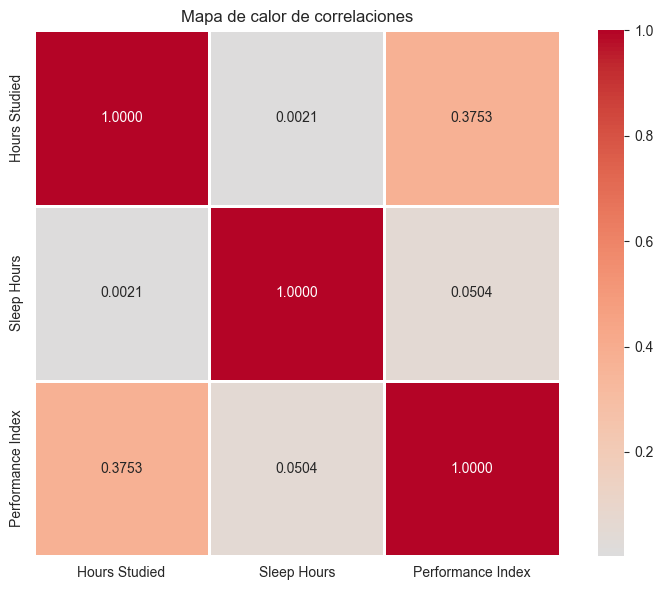

In [12]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlaciones, annot=True, cmap="coolwarm", center=0,
            fmt=".4f", square=True, linewidths=1)
plt.title("Mapa de calor de correlaciones")
plt.tight_layout()
plt.show()

In [13]:
print("\nCorrelación de cada variable con Performance Index:")
print(f"  Hours Studied  → {correlaciones.loc['Hours Studied', 'Performance Index']:.4f}")
print(f"  Sleep Hours    → {correlaciones.loc['Sleep Hours', 'Performance Index']:.4f}")
print(f"\nCorrelación entre variables independientes:")
print(f"  Hours Studied vs Sleep Hours → {correlaciones.loc['Hours Studied', 'Sleep Hours']:.4f}")


Correlación de cada variable con Performance Index:
  Hours Studied  → 0.3753
  Sleep Hours    → 0.0504

Correlación entre variables independientes:
  Hours Studied vs Sleep Hours → 0.0021


## 6. Ajuste de modelo de regresión múltiple

In [14]:
# Variables independientes y variable objetivo
X = df[["Hours Studied", "Sleep Hours"]]
y = df["Performance Index"]

# División en entrenamiento y prueba (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamaño conjunto de entrenamiento: {X_train.shape[0]}")
print(f"Tamaño conjunto de prueba: {X_test.shape[0]}")

Tamaño conjunto de entrenamiento: 7898
Tamaño conjunto de prueba: 1975


In [15]:
# Ajustar modelo de regresión lineal múltiple
modelo = LinearRegression()
modelo.fit(X_train, y_train)

print("Modelo de Regresión Múltiple ajustado")
print("=" * 50)
print(f"Intercepto (β₀): {modelo.intercept_:.4f}")
print(f"Coeficiente Hours Studied (β₁): {modelo.coef_[0]:.4f}")
print(f"Coeficiente Sleep Hours (β₂): {modelo.coef_[1]:.4f}")
print(f"\nEcuación del modelo:")
print(f"  Performance Index = {modelo.intercept_:.4f} + {modelo.coef_[0]:.4f} * Hours Studied + {modelo.coef_[1]:.4f} * Sleep Hours")

Modelo de Regresión Múltiple ajustado
Intercepto (β₀): 37.5530
Coeficiente Hours Studied (β₁): 2.7960
Coeficiente Sleep Hours (β₂): 0.5486

Ecuación del modelo:
  Performance Index = 37.5530 + 2.7960 * Hours Studied + 0.5486 * Sleep Hours


In [16]:
# Predicciones
y_pred_train = modelo.predict(X_train)
y_pred_test = modelo.predict(X_test)

# Métricas de evaluación
print("MÉTRICAS DE EVALUACIÓN")
print("=" * 50)
print("\n--- Conjunto de Entrenamiento ---")
print(f"  R² Score: {r2_score(y_train, y_pred_train):.4f}")
print(f"  MAE:      {mean_absolute_error(y_train, y_pred_train):.4f}")
print(f"  RMSE:     {np.sqrt(mean_squared_error(y_train, y_pred_train)):.4f}")

print("\n--- Conjunto de Prueba ---")
print(f"  R² Score: {r2_score(y_test, y_pred_test):.4f}")
print(f"  MAE:      {mean_absolute_error(y_test, y_pred_test):.4f}")
print(f"  RMSE:     {np.sqrt(mean_squared_error(y_test, y_pred_test)):.4f}")

MÉTRICAS DE EVALUACIÓN

--- Conjunto de Entrenamiento ---
  R² Score: 0.1443
  MAE:      15.3740
  RMSE:     17.7462

--- Conjunto de Prueba ---
  R² Score: 0.1384
  MAE:      15.4808
  RMSE:     17.9064


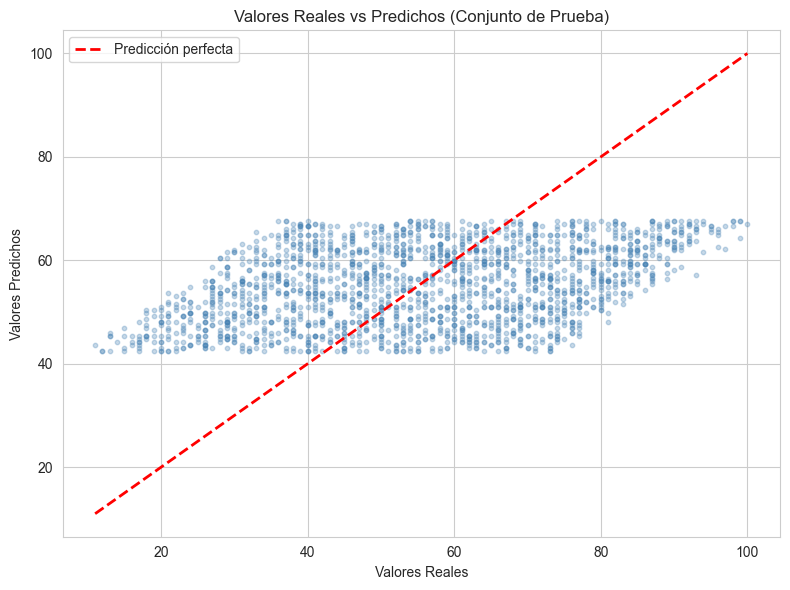

In [17]:
# Gráfico de valores reales vs predichos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, alpha=0.3, color="steelblue", s=10)
min_val = min(y_test.min(), y_pred_test.min())
max_val = max(y_test.max(), y_pred_test.max())
plt.plot([min_val, max_val], [min_val, max_val], color="red", linewidth=2, linestyle="--", label="Predicción perfecta")
plt.title("Valores Reales vs Predichos (Conjunto de Prueba)")
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.legend()
plt.tight_layout()
plt.show()

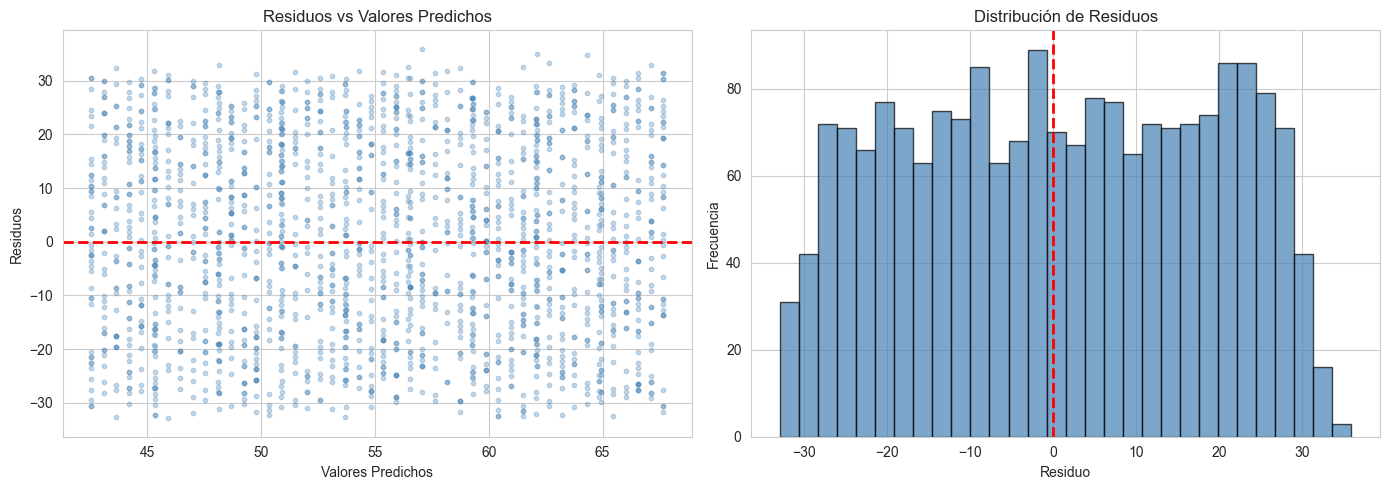

Media de residuos: 0.6129
Desviación estándar de residuos: 17.9004


In [18]:
# Análisis de residuos
residuos = y_test - y_pred_test

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Residuos vs Predichos
axes[0].scatter(y_pred_test, residuos, alpha=0.3, color="steelblue", s=10)
axes[0].axhline(y=0, color="red", linestyle="--", linewidth=2)
axes[0].set_title("Residuos vs Valores Predichos")
axes[0].set_xlabel("Valores Predichos")
axes[0].set_ylabel("Residuos")

# Distribución de residuos
axes[1].hist(residuos, bins=30, edgecolor="black", color="steelblue", alpha=0.7)
axes[1].axvline(x=0, color="red", linestyle="--", linewidth=2)
axes[1].set_title("Distribución de Residuos")
axes[1].set_xlabel("Residuo")
axes[1].set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()

print(f"Media de residuos: {residuos.mean():.4f}")
print(f"Desviación estándar de residuos: {residuos.std():.4f}")

## 7. Interpretación de coeficientes y análisis comparativo

In [19]:
# Resumen de coeficientes
coef_df = pd.DataFrame({
    "Variable": ["Hours Studied", "Sleep Hours"],
    "Coeficiente": modelo.coef_,
    "Correlación con Performance Index": [
        correlaciones.loc["Hours Studied", "Performance Index"],
        correlaciones.loc["Sleep Hours", "Performance Index"]
    ]
})
coef_df["Coeficiente Absoluto"] = coef_df["Coeficiente"].abs()
coef_df = coef_df.sort_values("Coeficiente Absoluto", ascending=False)
print("RESUMEN DE COEFICIENTES DEL MODELO")
print("=" * 60)
print(coef_df.to_string(index=False))

RESUMEN DE COEFICIENTES DEL MODELO
     Variable  Coeficiente  Correlación con Performance Index  Coeficiente Absoluto
Hours Studied     2.796037                           0.375332              2.796037
  Sleep Hours     0.548553                           0.050352              0.548553


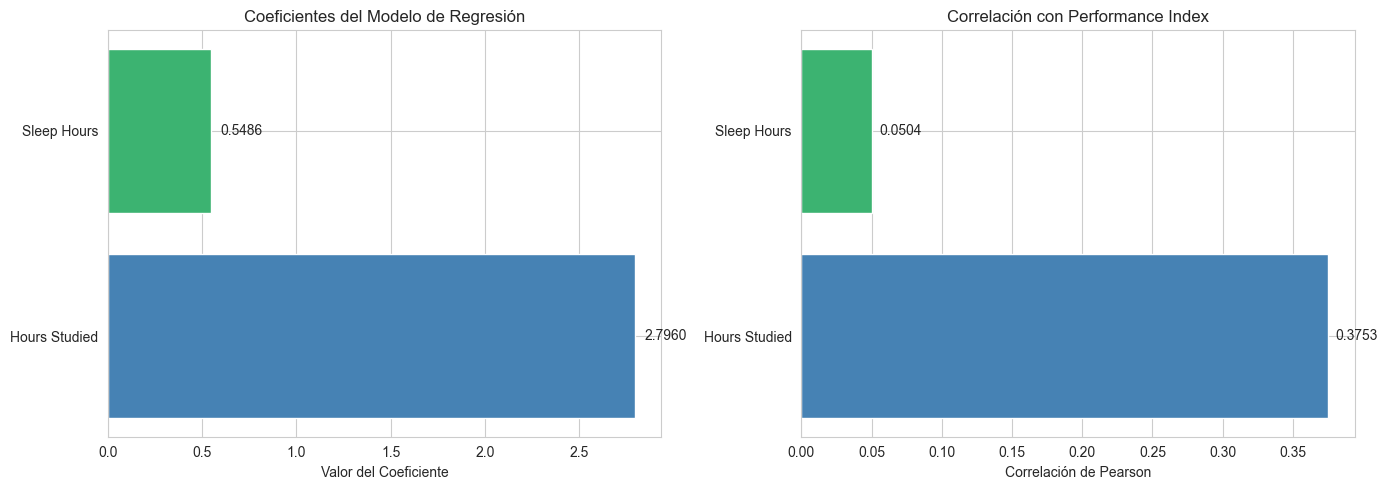

In [20]:
# Comparación visual de la importancia de cada variable
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

colores = ["steelblue", "mediumseagreen"]

# Coeficientes del modelo
axes[0].barh(coef_df["Variable"], coef_df["Coeficiente"], color=colores)
axes[0].set_title("Coeficientes del Modelo de Regresión")
axes[0].set_xlabel("Valor del Coeficiente")
for i, v in enumerate(coef_df["Coeficiente"]):
    axes[0].text(v + 0.05, i, f"{v:.4f}", va="center")

# Correlaciones
axes[1].barh(coef_df["Variable"], coef_df["Correlación con Performance Index"], color=colores)
axes[1].set_title("Correlación con Performance Index")
axes[1].set_xlabel("Correlación de Pearson")
for i, v in enumerate(coef_df["Correlación con Performance Index"]):
    axes[1].text(v + 0.005, i, f"{v:.4f}", va="center")

plt.tight_layout()
plt.show()

In [21]:
print("INTERPRETACIÓN DE RESULTADOS")
print("=" * 60)
print(f"\n1. COEFICIENTES DEL MODELO:")
print(f"   - Por cada hora adicional de estudio, el rendimiento")
print(f"     académico aumenta en promedio {modelo.coef_[0]:.4f} puntos,")
print(f"     manteniendo las horas de sueño constantes.")
print(f"")
print(f"   - Por cada hora adicional de sueño, el rendimiento")
print(f"     académico cambia en promedio {modelo.coef_[1]:.4f} puntos,")
print(f"     manteniendo las horas de estudio constantes.")
print(f"")
print(f"2. COMPARACIÓN DE INFLUENCIA:")
print(f"   - Las Horas Estudiadas tienen un coeficiente de {modelo.coef_[0]:.4f},")
print(f"     mientras que las Horas de Sueño tienen {modelo.coef_[1]:.4f}.")
print(f"   - Esto indica que las Horas de Estudio tienen una influencia")
print(f"     considerablemente mayor sobre el rendimiento académico.")
print(f"")
print(f"3. BONDAD DE AJUSTE:")
print(f"   - R² en test: {r2_score(y_test, y_pred_test):.4f}")
print(f"   - Esto significa que el modelo con estas dos variables explica")
print(f"     el {r2_score(y_test, y_pred_test)*100:.2f}% de la variabilidad")
print(f"     del rendimiento académico.")
print(f"")
print(f"4. CONCLUSIÓN:")
print(f"   Las horas de estudio son el factor más determinante entre")
print(f"   las dos variables analizadas. Las horas de sueño, aunque")
print(f"   incluidas en el modelo, muestran una influencia menor sobre")
print(f"   el rendimiento académico.")

INTERPRETACIÓN DE RESULTADOS

1. COEFICIENTES DEL MODELO:
   - Por cada hora adicional de estudio, el rendimiento
     académico aumenta en promedio 2.7960 puntos,
     manteniendo las horas de sueño constantes.

   - Por cada hora adicional de sueño, el rendimiento
     académico cambia en promedio 0.5486 puntos,
     manteniendo las horas de estudio constantes.

2. COMPARACIÓN DE INFLUENCIA:
   - Las Horas Estudiadas tienen un coeficiente de 2.7960,
     mientras que las Horas de Sueño tienen 0.5486.
   - Esto indica que las Horas de Estudio tienen una influencia
     considerablemente mayor sobre el rendimiento académico.

3. BONDAD DE AJUSTE:
   - R² en test: 0.1384
   - Esto significa que el modelo con estas dos variables explica
     el 13.84% de la variabilidad
     del rendimiento académico.

4. CONCLUSIÓN:
   Las horas de estudio son el factor más determinante entre
   las dos variables analizadas. Las horas de sueño, aunque
   incluidas en el modelo, muestran una influencia m